In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

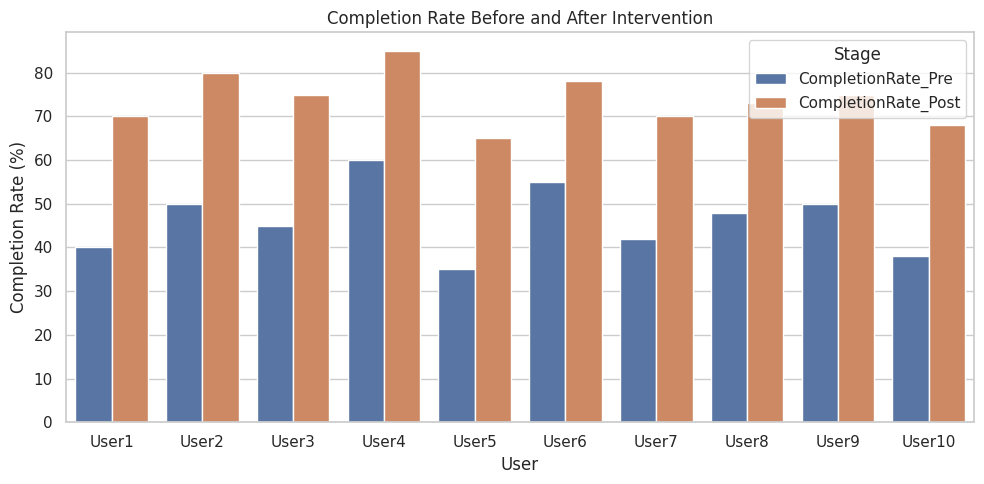

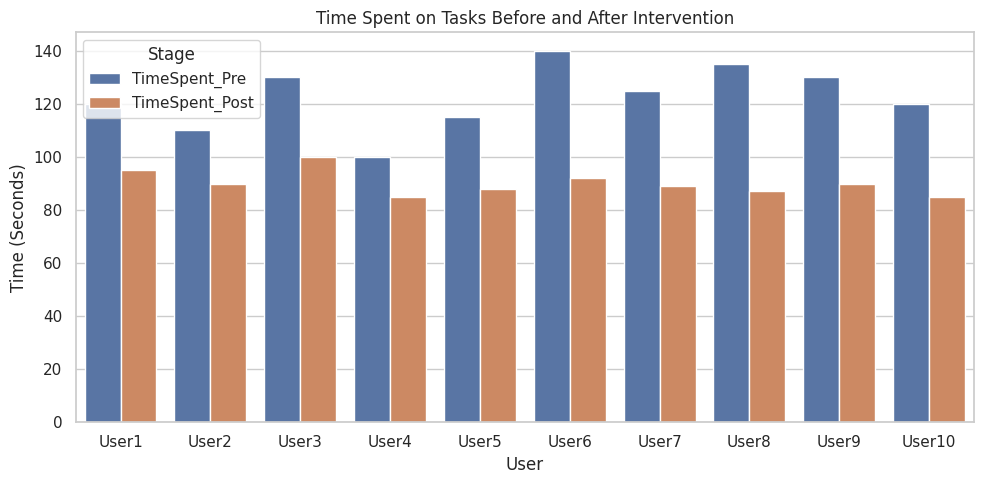

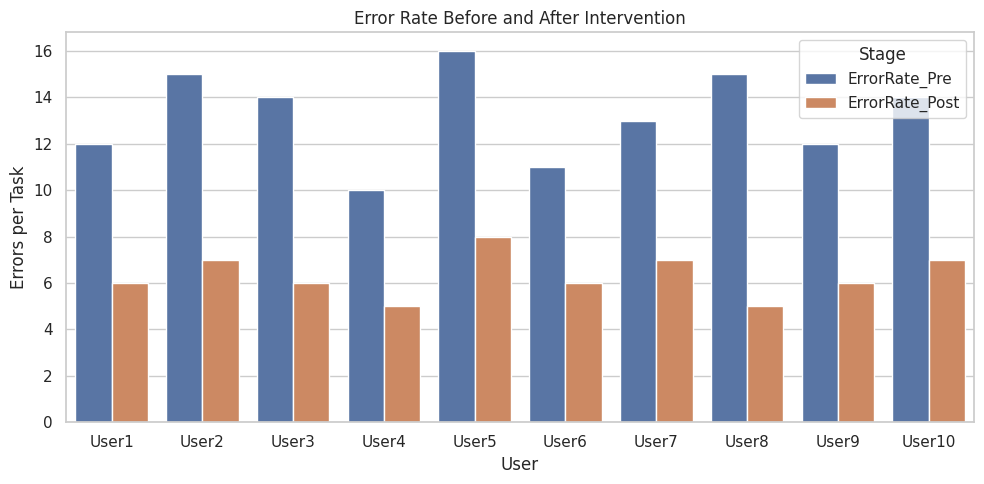

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data: Pre and post intervention for 10 users
data = {
    'User': [f'User{i+1}' for i in range(10)],
    'CompletionRate_Pre': [40, 50, 45, 60, 35, 55, 42, 48, 50, 38],
    'CompletionRate_Post': [70, 80, 75, 85, 65, 78, 70, 73, 75, 68],
    'TimeSpent_Pre': [120, 110, 130, 100, 115, 140, 125, 135, 130, 120],
    'TimeSpent_Post': [95, 90, 100, 85, 88, 92, 89, 87, 90, 85],
    'ErrorRate_Pre': [12, 15, 14, 10, 16, 11, 13, 15, 12, 14],
    'ErrorRate_Post': [6, 7, 6, 5, 8, 6, 7, 5, 6, 7],
}

df = pd.DataFrame(data)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot Completion Rate Improvement
plt.figure(figsize=(10, 5))
sns.barplot(x='User', y='value', hue='variable',
            data=pd.melt(df, id_vars=['User'], value_vars=['CompletionRate_Pre', 'CompletionRate_Post']))
plt.title('Completion Rate Before and After Intervention')
plt.ylabel('Completion Rate (%)')
plt.xlabel('User')
plt.legend(title='Stage')
plt.tight_layout()
plt.show()

# Plot Time Spent Reduction
plt.figure(figsize=(10, 5))
sns.barplot(x='User', y='value', hue='variable',
            data=pd.melt(df, id_vars=['User'], value_vars=['TimeSpent_Pre', 'TimeSpent_Post']))
plt.title('Time Spent on Tasks Before and After Intervention')
plt.ylabel('Time (Seconds)')
plt.xlabel('User')
plt.legend(title='Stage')
plt.tight_layout()
plt.show()

# Plot Error Rate Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='User', y='value', hue='variable',
            data=pd.melt(df, id_vars=['User'], value_vars=['ErrorRate_Pre', 'ErrorRate_Post']))
plt.title('Error Rate Before and After Intervention')
plt.ylabel('Errors per Task')
plt.xlabel('User')
plt.legend(title='Stage')
plt.tight_layout()
plt.show()


Descriptive Statistics:
       pre_test_score  post_test_score
count       10.000000        10.000000
mean        56.100000        68.400000
std          6.822349         7.321202
min         48.000000        59.000000
25%         50.500000        62.500000
50%         56.000000        68.500000
75%         59.500000        72.750000
max         70.000000        82.000000

Paired t-test Results:
T-statistic = 31.075, P-value = 0.000
Result: Statistically significant improvement (p < 0.05)


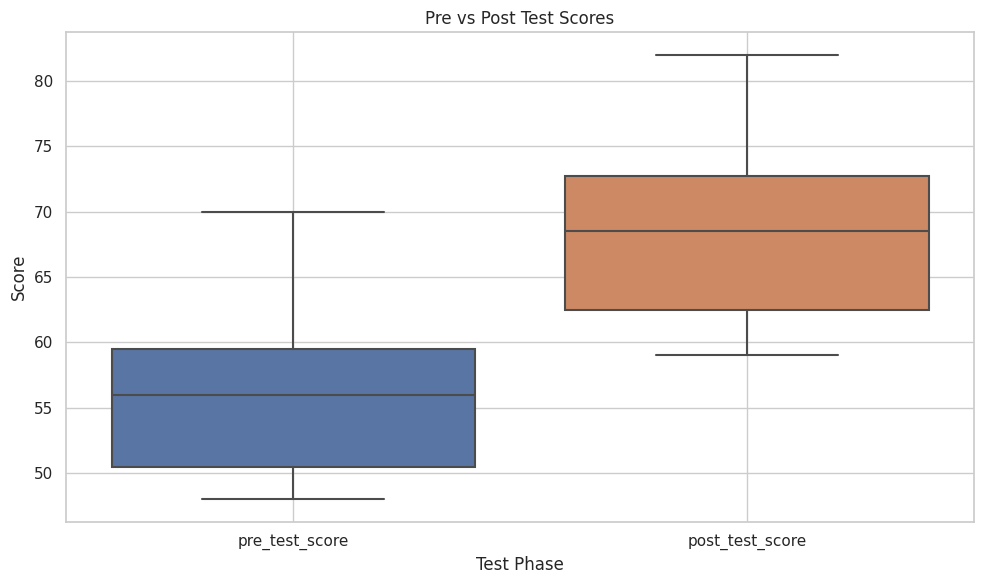

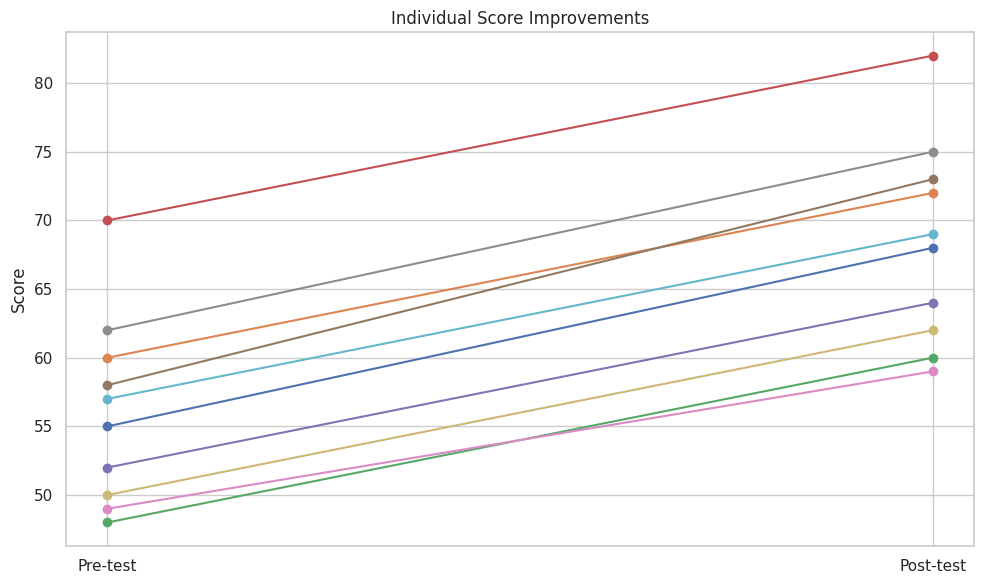

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data (replace with actual collected scores)
data = {
    'participant': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10'],
    'pre_test_score': [55, 60, 48, 70, 52, 58, 49, 62, 50, 57],
    'post_test_score': [68, 72, 60, 82, 64, 73, 59, 75, 62, 69]
}

df = pd.DataFrame(data)

# Descriptive Statistics
print("Descriptive Statistics:")
print(df[['pre_test_score', 'post_test_score']].describe())

# Paired t-test
t_stat, p_val = stats.ttest_rel(df['post_test_score'], df['pre_test_score'])
print(f"\nPaired t-test Results:\nT-statistic = {t_stat:.3f}, P-value = {p_val:.3f}")

# Interpretation
if p_val < 0.05:
    print("Result: Statistically significant improvement (p < 0.05)")
else:
    print("Result: No statistically significant improvement")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['pre_test_score', 'post_test_score']])
plt.title("Pre vs Post Test Scores")
plt.ylabel("Score")
plt.xlabel("Test Phase")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Line plot per participant
plt.figure(figsize=(10, 6))
for i in range(len(df)):
    plt.plot(['Pre-test', 'Post-test'], [df.loc[i, 'pre_test_score'], df.loc[i, 'post_test_score']], marker='o')
plt.title('Individual Score Improvements')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()


Summary Statistics:
        pre_score  post_score
count  20.000000   20.000000
mean   55.100000   68.550000
std     4.822098    6.091193
min    47.000000   58.000000
25%    51.750000   64.750000
50%    55.000000   68.500000
75%    59.250000   74.000000
max    63.000000   78.000000

Paired t-test: T-statistic = 35.370, P-value = 0.00000


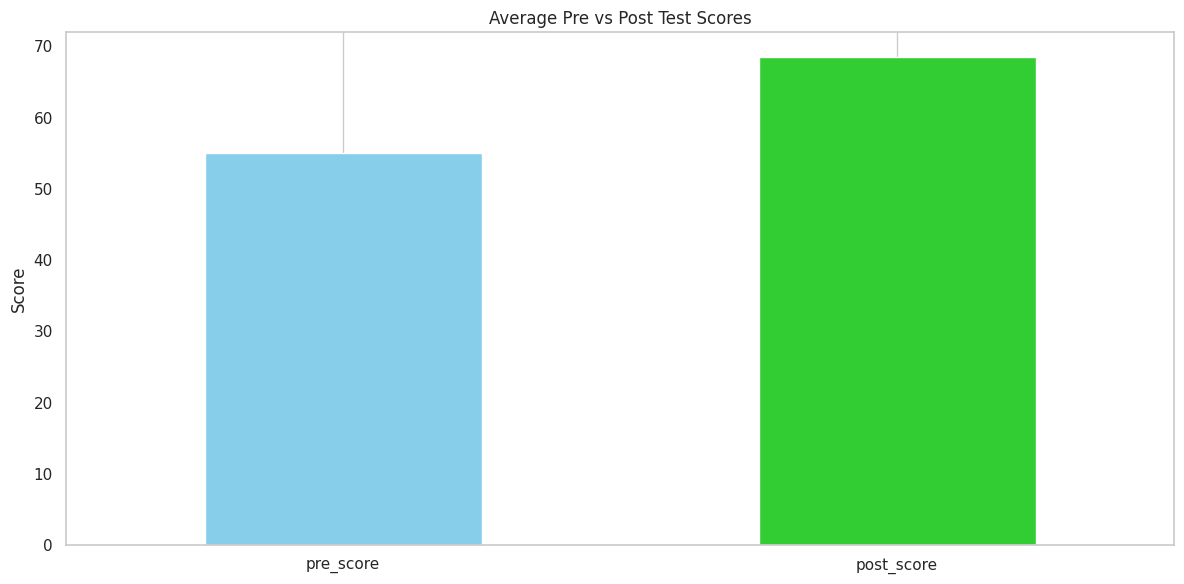

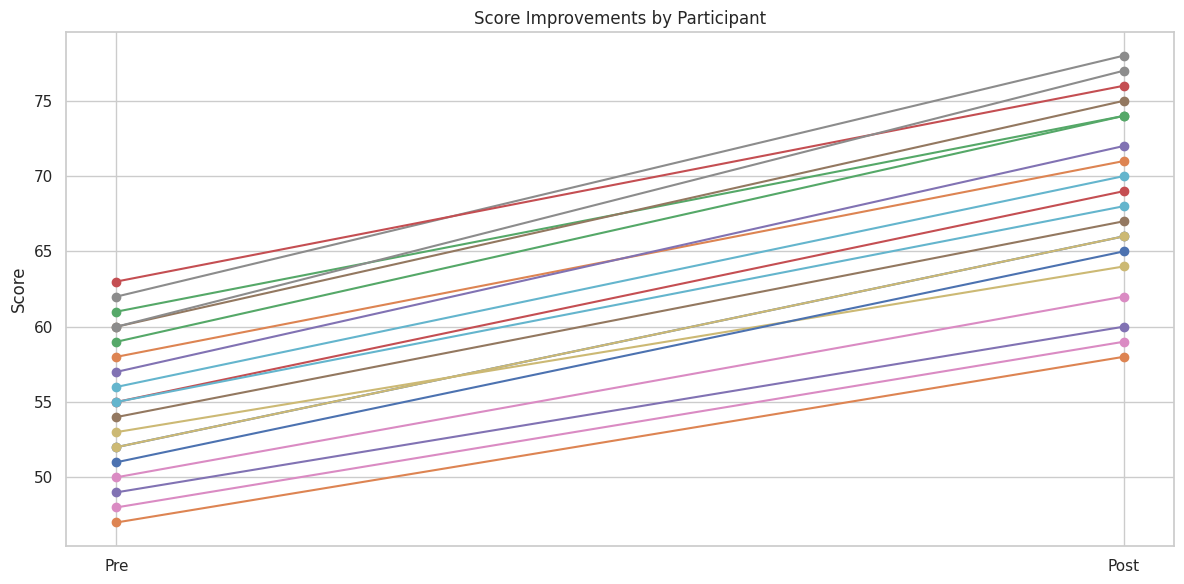

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Sample Data (extend or modify with actual results)
df = pd.DataFrame({
    'participant': [f'P{i+1}' for i in range(20)],
    'pre_score': [52, 58, 61, 55, 49, 60, 50, 62, 53, 56, 51, 47, 59, 63, 57, 54, 48, 60, 52, 55],
    'post_score': [66, 71, 74, 69, 60, 75, 62, 78, 64, 70, 65, 58, 74, 76, 72, 67, 59, 77, 66, 68]
})

# Descriptive summary
print("Summary Statistics:\n", df.describe())

# Paired t-test
t_stat, p_val = stats.ttest_rel(df['post_score'], df['pre_score'])
print(f"\nPaired t-test: T-statistic = {t_stat:.3f}, P-value = {p_val:.5f}")

# Bar Plot for Pre vs Post Scores
plt.figure(figsize=(12, 6))
df[['pre_score', 'post_score']].mean().plot(kind='bar', color=['skyblue', 'limegreen'])
plt.title("Average Pre vs Post Test Scores")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Line Plot for Individual Improvements
plt.figure(figsize=(12, 6))
for i in range(len(df)):
    plt.plot(['Pre', 'Post'], [df.loc[i, 'pre_score'], df.loc[i, 'post_score']], marker='o', linestyle='-')
plt.title("Score Improvements by Participant")
plt.ylabel("Score")
plt.grid(True)
plt.tight_layout()
plt.show()
